In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests

In [2]:
raw = requests.get("https://covid19.saglik.gov.tr/covid19api?getir=liste") # api'den veriyi alıyoruz
raw_json = raw.json() # dönen cevap içerisindeki json'u alıyoruz
df = pd.DataFrame(raw_json) # json'dan bir DataFrame oluşturuyoruz

In [3]:
df.head() # veriye bir göz gezdirelim

,tarih,gunluk_test,gunluk_vaka,gunluk_vefat,gunluk_iyilesen,toplam_test,toplam_vaka,toplam_vefat,toplam_iyilesen,toplam_yogun_bakim,toplam_entube,hastalarda_zaturre_oran,agir_hasta_sayisi
0,30.09.2020,112.098,1.391,65,1.245,10.380.261,318.663,8.195,279.749,,,6.4,1.516
1,29.09.2020,114.940,1.427,68,1.452,10.268.163,317.272,8.130,278.504,,,6.5,1.583
2,28.09.2020,115.523,1.412,65,1.422,10.153.223,315.845,8.062,277.052,,,6.5,1.596
3,27.09.2020,101.119,1.467,68,1.116,10.037.700,314.433,7.997,275.630,,,6.5,1.583
4,26.09.2020,102.009,1.511,71,1.232,9.936.581,312.966,7.929,274.514,,,6.6,1.615


In [4]:
df.info() # veri seti hakkında bilgi sahibi olalım

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   tarih                    203 non-null    object
 1   gunluk_test              203 non-null    object
 2   gunluk_vaka              203 non-null    object
 3   gunluk_vefat             203 non-null    object
 4   gunluk_iyilesen          203 non-null    object
 5   toplam_test              203 non-null    object
 6   toplam_vaka              203 non-null    object
 7   toplam_vefat             203 non-null    object
 8   toplam_iyilesen          203 non-null    object
 9   toplam_yogun_bakim       203 non-null    object
 10  toplam_entube            203 non-null    object
 11  hastalarda_zaturre_oran  203 non-null    object
 12  agir_hasta_sayisi        203 non-null    object
dtypes: object(13)
memory usage: 20.7+ KB


In [5]:
cols = df.columns.tolist() # veri setine ait kolonları bir listeye atıyoruz
cols.insert(1, cols.pop(cols.index('hastalarda_zaturre_oran'))) # bunu 2 satır aşağısı için yapıyoruz. Bu kolonu 2. sıraya çekeceğiz bu sayede aşağıda tip dönüşümleri yaparken takılmayacağız
df = df.reindex(columns=cols) # veri setini yeniden indexliyoruz (kolon sırasını değiştiriyoruz)

In [6]:
df['toplam_vaka'] = df['toplam_vaka'].apply(lambda x: str(f'{x}')).astype('string')
# toplam_vaka kolonunun veri tipini string olarak güncelliyoruz

In [7]:
for col_name in df.loc[:,'gunluk_test':].columns: # tüm satırları al VE gunluk_test kolonundan (dahil) son kolona kadar (dahil)
    df[f'{col_name}'] = df[f'{col_name}'].str.replace('.','').astype('string') # kolondaki değerleri formatla ve veri tipini string'e çevir
    df[f'{col_name}'] = pd.to_numeric(df[f'{col_name}']) # sayısal veri tipine dönüştürüyoruz 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tarih                    203 non-null    object 
 1   hastalarda_zaturre_oran  203 non-null    object 
 2   gunluk_test              187 non-null    float64
 3   gunluk_vaka              187 non-null    float64
 4   gunluk_vefat             187 non-null    float64
 5   gunluk_iyilesen          179 non-null    float64
 6   toplam_test              187 non-null    float64
 7   toplam_vaka              203 non-null    int64  
 8   toplam_vefat             197 non-null    float64
 9   toplam_iyilesen          187 non-null    float64
 10  toplam_yogun_bakim       123 non-null    float64
 11  toplam_entube            123 non-null    float64
 12  agir_hasta_sayisi        64 non-null     float64
dtypes: float64(10), int64(1), object(2)
memory usage: 20.7+ KB


In [9]:
df.isna().any() # evet veri tipini sayısal'a çevirince aralarda NaN değerler oldu

tarih                      False
hastalarda_zaturre_oran    False
gunluk_test                 True
gunluk_vaka                 True
gunluk_vefat                True
gunluk_iyilesen             True
toplam_test                 True
toplam_vaka                False
toplam_vefat                True
toplam_iyilesen             True
toplam_yogun_bakim          True
toplam_entube               True
agir_hasta_sayisi           True
dtype: bool

In [10]:
df.fillna(0,inplace=True) # NaN değerleri 0 olarak atamamızda bir sakınca yok, sonuçta bunlar o gün hiç hasta olmadığını belirtiyor. 0 atarsak mantıksal bir hata yapmış olmayız

In [11]:
for col_name in df.loc[:,'gunluk_test':].columns:  # tekrar int'e çevirmek istediğimiz tüm kolonları geziyoruz
    df[f'{col_name}'] = df[f'{col_name}'].astype('int') # veri tiplerini int'e çeviriyoruz ve mevcut kolon ile değiştiriyoruz

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   tarih                    203 non-null    object
 1   hastalarda_zaturre_oran  203 non-null    object
 2   gunluk_test              203 non-null    int64 
 3   gunluk_vaka              203 non-null    int64 
 4   gunluk_vefat             203 non-null    int64 
 5   gunluk_iyilesen          203 non-null    int64 
 6   toplam_test              203 non-null    int64 
 7   toplam_vaka              203 non-null    int64 
 8   toplam_vefat             203 non-null    int64 
 9   toplam_iyilesen          203 non-null    int64 
 10  toplam_yogun_bakim       203 non-null    int64 
 11  toplam_entube            203 non-null    int64 
 12  agir_hasta_sayisi        203 non-null    int64 
dtypes: int64(11), object(2)
memory usage: 20.7+ KB


In [13]:
df['hastalarda_zaturre_oran'] = df['hastalarda_zaturre_oran'].str.replace(',','.') # bu kolonu float yapmamız gerekmekte fakat ondalık kısımda '.' yerine  ',' olduğu için hata alacağız. Bu sebeple önce ','leri '.' ile replace ediyoruz

In [14]:
df['hastalarda_zaturre_oran'] = pd.to_numeric(df['hastalarda_zaturre_oran']) # ardından sütunu sxayısal'a çeviriyoruz

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tarih                    203 non-null    object 
 1   hastalarda_zaturre_oran  64 non-null     float64
 2   gunluk_test              203 non-null    int64  
 3   gunluk_vaka              203 non-null    int64  
 4   gunluk_vefat             203 non-null    int64  
 5   gunluk_iyilesen          203 non-null    int64  
 6   toplam_test              203 non-null    int64  
 7   toplam_vaka              203 non-null    int64  
 8   toplam_vefat             203 non-null    int64  
 9   toplam_iyilesen          203 non-null    int64  
 10  toplam_yogun_bakim       203 non-null    int64  
 11  toplam_entube            203 non-null    int64  
 12  agir_hasta_sayisi        203 non-null    int64  
dtypes: float64(1), int64(11), object(1)
memory usage: 20.7+ KB


In [16]:
df['tarih'] = pd.to_datetime(df['tarih']) # tarih sütunumuzu da DateTime tip olarak güncelliyoruz

In [17]:
df.info() # artık chart çıkartmak için hazırız ^^

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   tarih                    203 non-null    datetime64[ns]
 1   hastalarda_zaturre_oran  64 non-null     float64       
 2   gunluk_test              203 non-null    int64         
 3   gunluk_vaka              203 non-null    int64         
 4   gunluk_vefat             203 non-null    int64         
 5   gunluk_iyilesen          203 non-null    int64         
 6   toplam_test              203 non-null    int64         
 7   toplam_vaka              203 non-null    int64         
 8   toplam_vefat             203 non-null    int64         
 9   toplam_iyilesen          203 non-null    int64         
 10  toplam_yogun_bakim       203 non-null    int64         
 11  toplam_entube            203 non-null    int64         
 12  agir_hasta_sayisi        203 non-nul

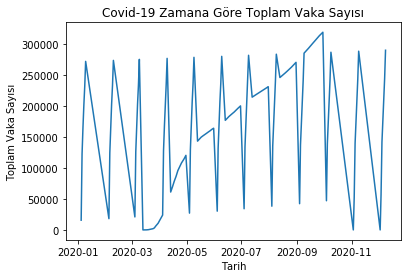

In [18]:
sns.lineplot(x='tarih',y='toplam_vaka',data=df)
sns.set(rc={'figure.figsize':(25,10)},style='darkgrid')
plt.xlabel('Tarih')
plt.ylabel('Toplam Vaka Sayısı')
plt.title('Covid-19 Zamana Göre Toplam Vaka Sayısı')
plt.show()

In [19]:
df['tarih'].describe()


count                     203
unique                    203
top       2020-03-13 00:00:00
freq                        1
first     2020-01-04 00:00:00
last      2020-12-09 00:00:00
Name: tarih, dtype: object

In [20]:
df

,tarih,hastalarda_zaturre_oran,gunluk_test,gunluk_vaka,gunluk_vefat,gunluk_iyilesen,toplam_test,toplam_vaka,toplam_vefat,toplam_iyilesen,toplam_yogun_bakim,toplam_entube,agir_hasta_sayisi
0,2020-09-30,6.4,112098,1391,65,1245,10380261,318663,8195,279749,0,0,1516
1,2020-09-29,6.5,114940,1427,68,1452,10268163,317272,8130,278504,0,0,1583
2,2020-09-28,6.5,115523,1412,65,1422,10153223,315845,8062,277052,0,0,1596
3,2020-09-27,6.5,101119,1467,68,1116,10037700,314433,7997,275630,0,0,1583
4,2020-09-26,6.6,102009,1511,71,1232,9936581,312966,7929,274514,0,0,1615
...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,2020-03-15,NaN,0,0,0,0,0,18,0,0,0,0,0
199,2020-03-14,NaN,0,0,0,0,0,6,0,0,0,0,0
200,2020-03-13,NaN,0,0,0,0,0,5,0,0,0,0,0
201,2020-12-03,NaN,0,0,0,0,0,1,0,0,0,0,0


In [33]:
df['tarih'][df.first_valid_index()] # ilk indexi alır, yani son eklenen gün (bu veri seti için)

Timestamp('2020-09-30 00:00:00')

In [35]:
df['tarih'][df.last_valid_index()] # son indexi alır, yani ilk eklenen gün (bu veri seti için)

Timestamp('2020-11-03 00:00:00')